# Grain Facet project:

## Plot facet angle as a function of dimensionless disturbance rate and weathering (or dissolution) rate, for runs with a 50% larger domain dimension, to compare with "base" runs

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in data from 124 model runs that have already been compiled into a .csv file. Read into arrays for the disturbance-rate parameter, the weathering-rate parameter, and the resulting facet slope angle.

In [2]:
filename = 'facet_angle_dw_large20190330.csv'

In [3]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))
print('There are ' + str(num_lines) + ' lines in the file.')

# Create data arrays
dist_param = np.zeros(num_lines - 1)
weath_param = np.zeros(num_lines - 1)
facet_angle = np.zeros(num_lines - 1)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(', '.join(row))
        if i >= 1:
            weath_param[i-2] = row[2]
            dist_param[i-2] = row[1]
            facet_angle[i-2] = row[3]
        i += 1

There are 125 lines in the file.
Run name, Disturbance rate parameter, Weathering rate parameter, Slope angle, Slope gradient, Intercept
d-30w-23, 0.001, 0.005011872336272719, 28.8679129504, 0.55129919879, 0.647770972796
d-40w-36, 0.0001, 0.00025118864315095795, 48.9760223529, 1.14939657992, 0.250391682097
d-40w-31, 0.0001, 0.0007943282347242813, 36.1787999969, 0.731321305229, 0.612875658738
d-30w-24, 0.001, 0.003981071705534969, 29.3050781996, 0.561290376358, 0.397521720553
d-40w-38, 0.0001, 0.00015848931924611126, 52.0516891069, 1.28232446913, 0.822247543085
d-30w-12, 0.001, 0.0630957344480193, 28.5187839681, 0.543380265458, 0.807149978636
d-30w-15, 0.001, 0.03162277660168379, 28.5620526832, 0.544358825236, 0.857142857143
d-30w-14, 0.001, 0.03981071705534971, 28.5569640909, 0.544243700556, 0.787494658881
d-40w-39, 0.0001, 0.0001258925411794166, 53.2675500318, 1.34001838009, 1.26976214214
d-30w-13, 0.001, 0.05011872336272722, 28.6071015944, 0.545378500971, 0.610881640792
d-30w-25, 0.0

Convert the data into a pandas DataFrame. This allows us to sort the data set according to $d$ and $w$, which in turn will make it possible to turn the data into 4 x 31 array in which each row represents one set of experiments at a fixed value of $d$.

In [4]:
import pandas as pd

In [5]:
data = {'d' : dist_param, 'w': weath_param, 'angle': facet_angle}
df = pd.DataFrame(data)
df = df.sort_values(by=['d', 'w'])

Reshape into 4 x 31 arrays in which each row is a unique value of $d$. Print the ``dist_param`` values to make sure it worked.

In [6]:
facet_angle = df['angle'].values.reshape((4, 31))
weath_param = df['w'].values.reshape((4, 31))
dist_param = df['d'].values.reshape((4, 31))
dist_param

array([[0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
        0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
        0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
        0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
       [0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
        0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
        0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
        0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ],
       [0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  ,
        0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  ,
        0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  ,
        0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  ],
       [0.1   , 0.1   , 0.1   , 0.1   , 0.1   , 0.1   , 0.1   , 0.1   ,
        0.1   , 0.1   , 0.1   , 0.1   , 0.1   , 0.1   , 0.1   , 0.1   ,
        0.1  

Read facet angle from dissolution-only runs. This is another set of model runs that we want to include on the figure.

In [7]:
# Name of file
filename = 'dissolution_long_domain20190311.csv'

# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
diss_param = np.zeros(num_lines - 2)  # we'll skip 2 header lines
diss_facet_angle = np.zeros(num_lines - 2)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(', '.join(row))
        if i >= 2:
            diss_param[i-2] = row[0]
            diss_facet_angle[i-2] = row[2]
        i += 1

Landlab version, 1.7.0+15.g1764eb3f, 
Dissolution rate parameter (1/yr), Gradient (m/m), Slope angle (deg)
0.0002, 0.82404884912, 39.4901895413
0.00024, 0.644706866237, 32.810153595
0.00028, 0.534296429598, 28.115431014
0.00032, 0.441043524674, 23.7995670076
0.00036, 0.288452281903, 16.0903267272
0.0004, 0.201972724765, 11.4185726704
0.00044, 0.10976357524, 6.26391395369
0.00048, 0.0224836295957, 1.28800007937


Plot the data. First, we'll define four plotting symbols for each of the four values of $d'$. Then we'll plot, for each of the four, the facet angle as a function of weathering parameter ($w'$).

Next, we add the dissolution runs (using the dissolution parameter, which corresponds to a weathering parameter in a world where $d'\rightarrow \infty$).

Then add the curve that represents the analytical solution for the dissolution-only case. Also plot the model's effective 30$^\circ$ angle of repose for reference.

Finally, add axis labels, legend, etc., and save the figure to a file.

In [8]:
psyms = ['k.', 'k+', 'k^', 'k*']

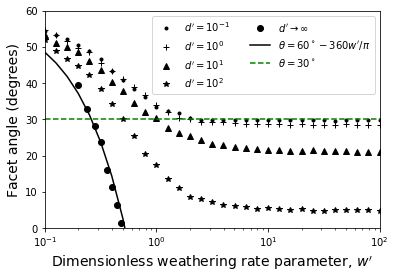

In [9]:
# Plot the weathering + disturbance runs
for d in range(4):
    plt.semilogx(10.0**3 * weath_param[d,:], facet_angle[d,:], psyms[d])

# Plot the dissolution runs
plt.semilogx(10.0**3 * diss_param, diss_facet_angle, 'ko')

# Analytical solution for dissolution only
wprime = 10**3 * 10.0 ** np.arange(-4.0, -0.9, 0.1)
ang_pred = 60.0 - 2 * (180.0 / np.pi) * wprime
plt.plot(wprime, ang_pred, 'k')
plt.ylim([0, 60])

# Angle of repose
ww = np.array([0.1, 100.0])
angrep = np.array([30.0, 30.0])
plt.plot(ww, angrep, 'g--')

# Axis limits
plt.xlim([0.1, 100])

# Labels and legend
plt.xlabel(r"Dimensionless weathering rate parameter, $w'$", fontsize=14)
plt.ylabel('Facet angle (degrees)', fontsize=14)
plt.legend([r"$d'= 10^{-1}$", r"$d'= 10^0$", r"$d'= 10^1$", r"$d'= 10^2$", r"$d' \rightarrow \infty$", r"$\theta = 60^\circ - 360 w' / \pi$", r"$\theta = 30^\circ$"], ncol=2, fontsize=10)

plt.savefig('facet_angle_vs_wprime_larger_domain.pdf')

This next figure isn't meant for the paper, but is just here to check out what it looks like if you plot *difference* between fault dip and facet angle instead of the facet angle itself.

(0, 60)

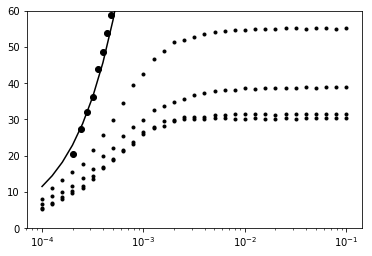

In [10]:
dang = 60.0 - facet_angle
plt.semilogx(weath_param, dang, 'k.')
plt.semilogx(diss_param, 60.0 - diss_facet_angle, 'ko')
w = 10.0 ** np.arange(-4.0, -0.9, 0.1)
ang_pred = w * 10**3 * 360.0 / np.pi
plt.plot(w, ang_pred, 'k')
plt.ylim([0, 60])